# Plots coprecessing angles with dynamics

In [1]:
# Setup ipython environment
%load_ext autoreload
%autoreload 2
%matplotlib inline
# Setup the notebook's environment
import lalsimulation as lalsim
import lal
import numpy as np
from numpy import *
from matplotlib.pyplot import *
from positive import *
from nrutils import lalphenom
from positive.units import *
from nrutils import scsearch,gwylm
from xcp import *
import warnings
from nrutils.manipulate.rotate import gwylm_radiation_axis_workflow

(positive)>> Applying custom matplotlib settings.
(init)>> Warm greetings from XCP.
(xcp.core)>> Catalog of calibration runs stored to "xcp.xcp_catalog"
(xcp.core)>> Metadata dictionary for Ed's catalog paper stored to "xcp.catalog_paper_metadata"


In [2]:
# Let the user know where lalsimulation lives
alert('We are getting our LALSimulation from:\n%s'%green(lalsim.__path__[0]))

(notebook)>> We are getting our LALSimulation from:
/Users/book/opt/anaconda2/envs/hack-phenomx/lib/python2.7/site-packages/lalsimulation


In [103]:
# Find a catalog entry of interest using a keyword search
# a = scsearch(keyword='q1a02t120',verbose=True)[0]
# a = scsearch(keyword='q1a02t60_T_96_384',verbose=True)[0]
a = scsearch(keyword='q2_a10_a28_ph0_th30',verbose=True)[0]

(scsearch)>> Found keyword (=q2_a10_a28_ph0_th30) keyword.
(scsearch)>> Found verbose (=True) keyword.
(scsearch)>> List of keywords or string keyword found: ALL scentry objects matching will be passed. To pass ANY entries matching the keywords, input the keywords using an iterable of not of type list.
(scsearch)>> ## Found 3 possibly degenerate simulations:
(scsearch)>> [0001][pnr-catalog] q2: 1chi0.80-p-q2.00	(q2_a10_a28_ph0_th30)
(scsearch)>> [0002][hogshead] chinmay_precessingRuns: 1chi0.80-p-q2.00	(q2_a10_a28_ph0_th30)
(scsearch)>> [0003][hogshead] chinmay_precessingRuns: 1chi0.80-p-q2.00	(q2_a10_a28_ph0_th30_80_Points)



In [104]:
#
frame = {}

# Define loading parameters
lmax = 4 # NOTE --- if we want moments up to ell, then lmax=ell+1 is needed for minimal accuracy
pad = 1000
clean = True
dt = 0.5


# Select multipole moments to use when calculating coprecessing frame
cpframe_select_lm = None # [ (2,1), (2,2), (2,-1), (2,-2), (2,0) ]

# Load
frame['bam'] = gwylm(a,lmax=lmax,dt=dt,pad=pad,clean=clean,verbose=False)

(romline!)>> N is 2, but it must be less than or equal to 3. We have set N=3. This course is often desired in cases where N=2 is naively given.
(straighten_wfarr!)>> The time series has been found to be non-monotonic. We will sort the data to enforce monotinicity.
(straighten_wfarr!)>> The time series has been found to be non-monotonic. We will sort the data to enforce monotinicity.
(straighten_wfarr!)>> The time series has been found to be non-monotonic. We will sort the data to enforce monotinicity.
(straighten_wfarr!)>> The time series has been found to be non-monotonic. We will sort the data to enforce monotinicity.


In [105]:
# Put waveform in variouis frames 
frame['ji'] = frame['bam'].__calc_initial_j_frame__()
frame['li'] = frame['bam'].__calc_initial_l_frame__()
frame['jt'] = frame['ji' ].__calc_j_of_t_frame__()

(__rotate_frame_at_all_times__)>> Attempting to rotate dynamics timeseries in this.dynamics
(__rotate_frame_at_all_times__)>> Note that metadata at the scentry level (i.e. this.__scentry__) have not been rotated, but this.Sf, this.R1 and others have been rotated. This includes radiated and remnant quantities.
(__rotate_frame_at_all_times__)>> Attempting to rotate dynamics timeseries in this.dynamics
(__rotate_frame_at_all_times__)>> Note that metadata at the scentry level (i.e. this.__scentry__) have not been rotated, but this.Sf, this.R1 and others have been rotated. This includes radiated and remnant quantities.
(__rotate_frame_at_all_times__)>> Attempting to rotate dynamics timeseries in this.dynamics
(__rotate_frame_at_all_times__)>> Note that metadata at the scentry level (i.e. this.__scentry__) have not been rotated, but this.Sf, this.R1 and others have been rotated. This includes radiated and remnant quantities.


In [106]:

# Calculate coprecessing angles 
foo = gwylm_radiation_axis_workflow( frame['ji'], kind='psi4', select_lm_list = cpframe_select_lm )


(gwylm_radiation_axis_workflow)>> Calculating Radiated Quantities
(gwylm_radiation_axis_workflow)>> Calculating TD Radiation Axis Series
(calc_coprecessing_angles)>> The domain values seem unevenly split between positive and negative values. Thus, we will interpret the input as corresponding to TIME DOMAIN data.
(calc_coprecessing_angles!)>> flipping manually for negative domain
(gwylm_radiation_axis_workflow)>> Calculating FD Radiation Axis Series
(calc_coprecessing_angles)>> The domain values seem evenly split between positive and negative values. Thus, we will interpret the input as corresponding to FREQUENCY DOMAIN data.


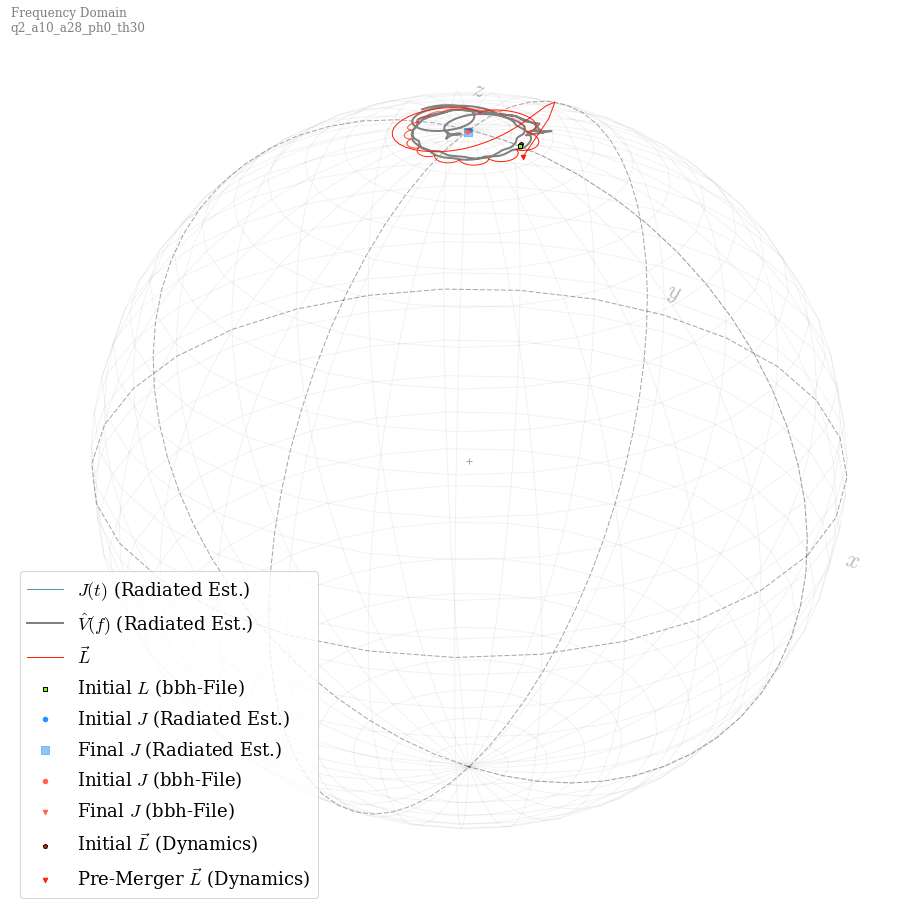

In [107]:

# foo.save = True
foo.save = False
foo.outdir='/Users/book/Desktop/'
fig,ax = foo.plot_radiation_axis_on_sphere(domain='freq')


(<Figure size 1152x1152 with 3 Axes>,
 (<matplotlib.axes._subplots.AxesSubplot at 0xb196fe6d0>,
  <matplotlib.axes._subplots.AxesSubplot at 0xb19d7fa50>))

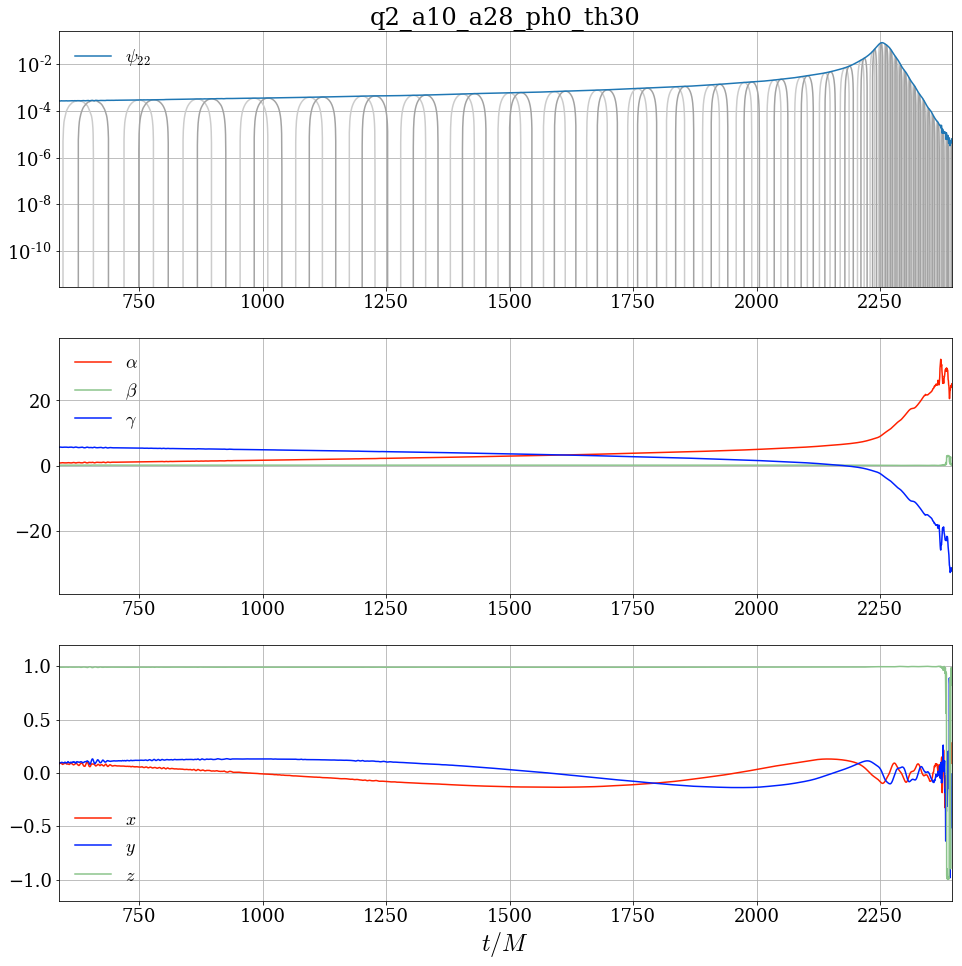

In [108]:
foo.plot_radiation_axis_3panel()

In [109]:



#
threshold = 0.5

#
domain = foo.radiation_axis['td_domain']

#
X = foo.radiation_axis['td_x'].copy()
Y = foo.radiation_axis['td_y'].copy()
Z = foo.radiation_axis['td_z'].copy()
    
#
test = lambda A,l,r: abs(A[r]-A[l]) > threshold

# For all domain points 
for right in range(1,len(domain)):
    
    #
    left = right-1
    
    #
    x_status = test( X, left, right )
    y_status = test( Y, left, right )
    z_status = test( Z, left, right )
    
    #
    if x_status:# or y_status or z_status:
        
        #
        X[right:] *= -1
        Y[right:] *= -1
        Z[right:] *= -1
        
Y = reflect_unwrap(Y)
Z = reflect_unwrap(Z)

# For all domain points 
for right in range(1,len(domain)):
    
    #
    left = right-1
    
    #
    x_status = test( X, left, right )
    y_status = test( Y, left, right )
    z_status = test( Z, left, right )
    
    #
    if y_status:# or y_status or z_status:
        
        #
        X[right:] *= -1
        Y[right:] *= -1
        Z[right:] *= -1
        
X = reflect_unwrap(X)
Y = reflect_unwrap(Y)
Z = reflect_unwrap(Z)


In [110]:

# # For all domain points 
# for right in range(len(domain)-1,1,-1):
    
#     #
#     left = right-1
    
#     #
#     x_status = test( X, left, right )
#     y_status = test( Y, left, right )
#     z_status = test( Z, left, right )
    
#     #
#     if x_status or y_status or z_status:
        
#         #
#         X[right:] *= -1
#         Y[right:] *= -1
#         Z[right:] *= -1
        

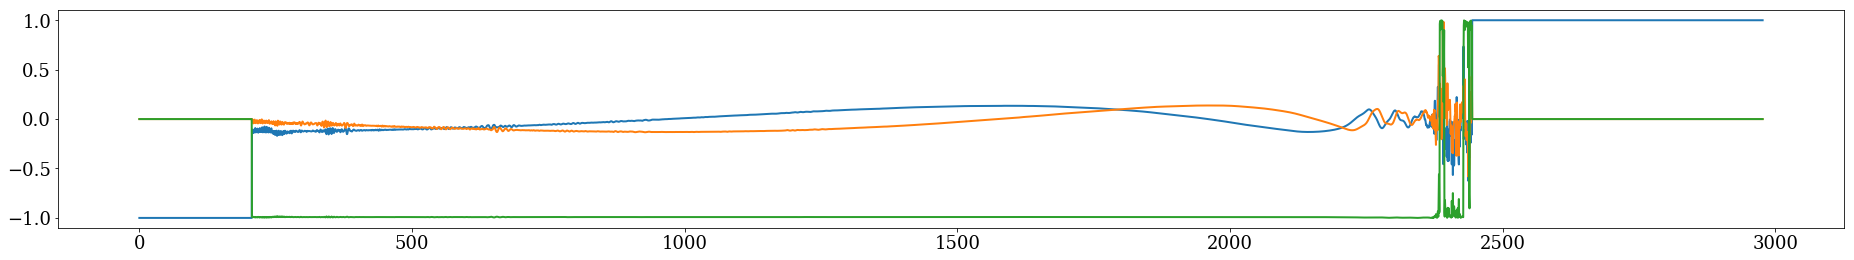

In [111]:
figure( figsize=2*figaspect(0.1) )

plot( domain, X, lw=2 )
plot( domain, Y, lw=2 )
plot( domain, Z, lw=2 )

# xlim(1700,1800)

In [ ]:

figure( figsize=2*figaspect(0.1) )

plot( foo.radiation_axis['td_domain'], foo.radiation_axis['td_x'] )
plot( foo.radiation_axis['td_domain'], foo.radiation_axis['td_y'] )
plot( foo.radiation_axis['td_domain'], foo.radiation_axis['td_z'] )
plot( foo.radiation_axis['td_domain'], [ linalg.norm([foo.radiation_axis['td_x'][k],foo.radiation_axis['td_y'][k],foo.radiation_axis['td_z'][k]]) for k in range(len(foo.radiation_axis['td_domain'])) ] )
xlim( 1500, 2000 )
